In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_csv('spam_ham_dataset.csv')
df. head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
df['text'].describe()

count                                                  5171
unique                                                 4993
top       Subject: calpine daily gas nomination\r\n>\r\n...
freq                                                     20
Name: text, dtype: object

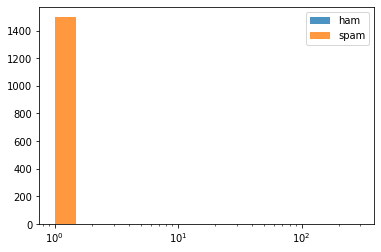

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['label_num'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['label_num'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
X = df[['text','label_num']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3464, 2)
Testing Data Shape:  (1707, 2)


In [ ]:
X_train.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            label_num
Subject: calpi

In [ ]:
y_train.value_counts()

ham     2426
spam    1038
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

ham     1246
spam     461
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_train.value_counts()

ham     2426
spam    1038
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

ham     1246
spam     461
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3464, 40867)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3464, 40867)

In [ ]:
pd.DataFrame(X_train_tfidf)[0]

0         (0, 40508)\t0.06725429833475978\n  (0, 40498...
1         (0, 40498)\t0.043271543412021225\n  (0, 3992...
2         (0, 40778)\t0.0931152091462377\n  (0, 40498)...
3         (0, 39613)\t0.10519125751216014\n  (0, 39482...
4         (0, 39613)\t0.07572361287684203\n  (0, 38353...
                              ...                        
3459      (0, 40508)\t0.009284539014541463\n  (0, 4049...
3460      (0, 40498)\t0.05025820691232805\n  (0, 39725...
3461      (0, 40661)\t0.08018706376722393\n  (0, 40508...
3462      (0, 39354)\t0.16847612601659523\n  (0, 36442...
3463      (0, 40498)\t0.05257172124655783\n  (0, 40404...
Name: 0, Length: 3464, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3464, 40867)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


text_clf.fit(X_train, y_train)


predictions = text_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1231   15]
 [   5  456]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1246
        spam       0.97      0.99      0.98       461

    accuracy                           0.99      1707
   macro avg       0.98      0.99      0.99      1707
weighted avg       0.99      0.99      0.99      1707



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.9882835383714118


In [ ]:
text_clf.predict(['Hi How are you , i am alaa from Egypt? '])[0]

'spam'

In [ ]:
text_clf.predict(['Congratulations , you won @ new stage '])[0]

'spam'

In [ ]:
text_clf.predict(['Subject: hi in April 4 , 2022 '])[0]

'spam'

**Let's check with some Real time spam mails**

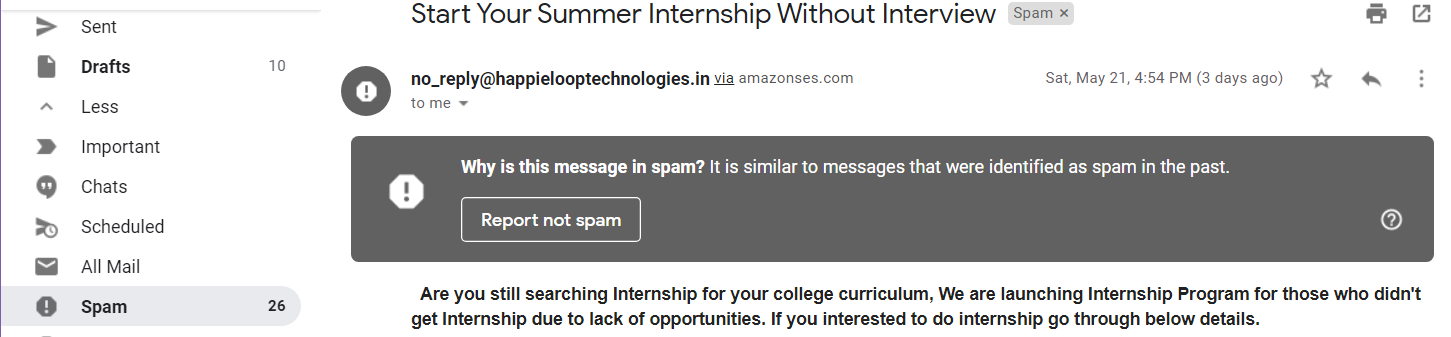

In [ ]:
text_clf.predict([' Are you still searching Internship for your college curriculum, We are launching Internship Program for those who didnt get Internship due to lack of opportunities. If you interested to do internship go through below details.'])[0]

'spam'